In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('../data/uec_data_2023_2025_full.csv')

In [14]:
df['weekday']= pd.to_datetime(df['Date'], dayfirst=True).dt.day_of_week

In [15]:
hosp_sums=df.groupby('Hospital')['Total'].sum()
hospitals_over_1 = hosp_sums[hosp_sums > 1].index.tolist()
#hospitals_over_1

## Total Trolly Densities

<Axes: title={'center': 'Distribution of daily occupied trollies per hospital'}, ylabel='Density'>

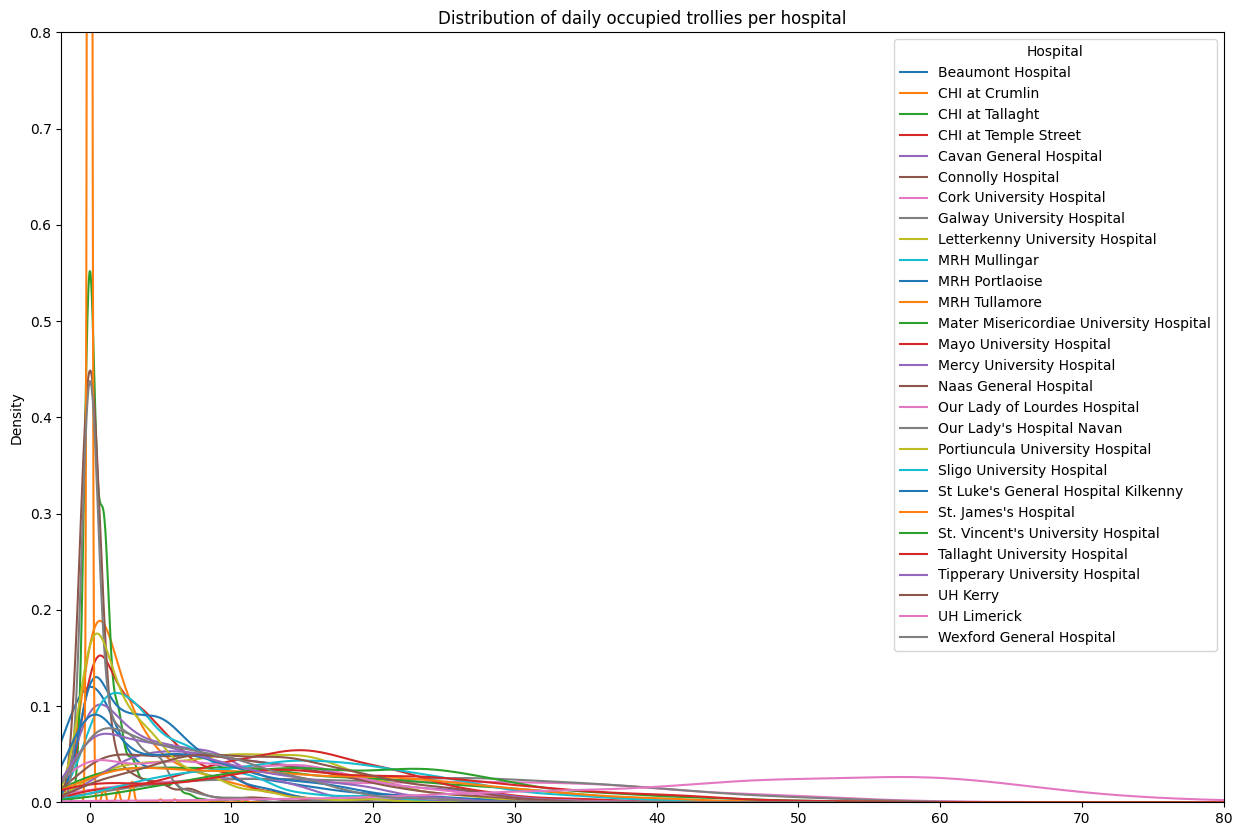

In [16]:
df_filt=df[(~df['Hospital'].str.contains('Total')) & (df['Hospital'].isin(hospitals_over_1))]
df_filt.pivot(columns='Hospital', values='Total').plot(kind='kde',\
                                                       figsize=(15,10),\
                                                        xlim=(-2,80),\
                                                       title="Distribution of daily occupied trollies per hospital",\
                                                        ylim=(0,.8))


<Axes: title={'center': 'Distribution of daily occupied trollies for UH Limerick'}, ylabel='Density'>

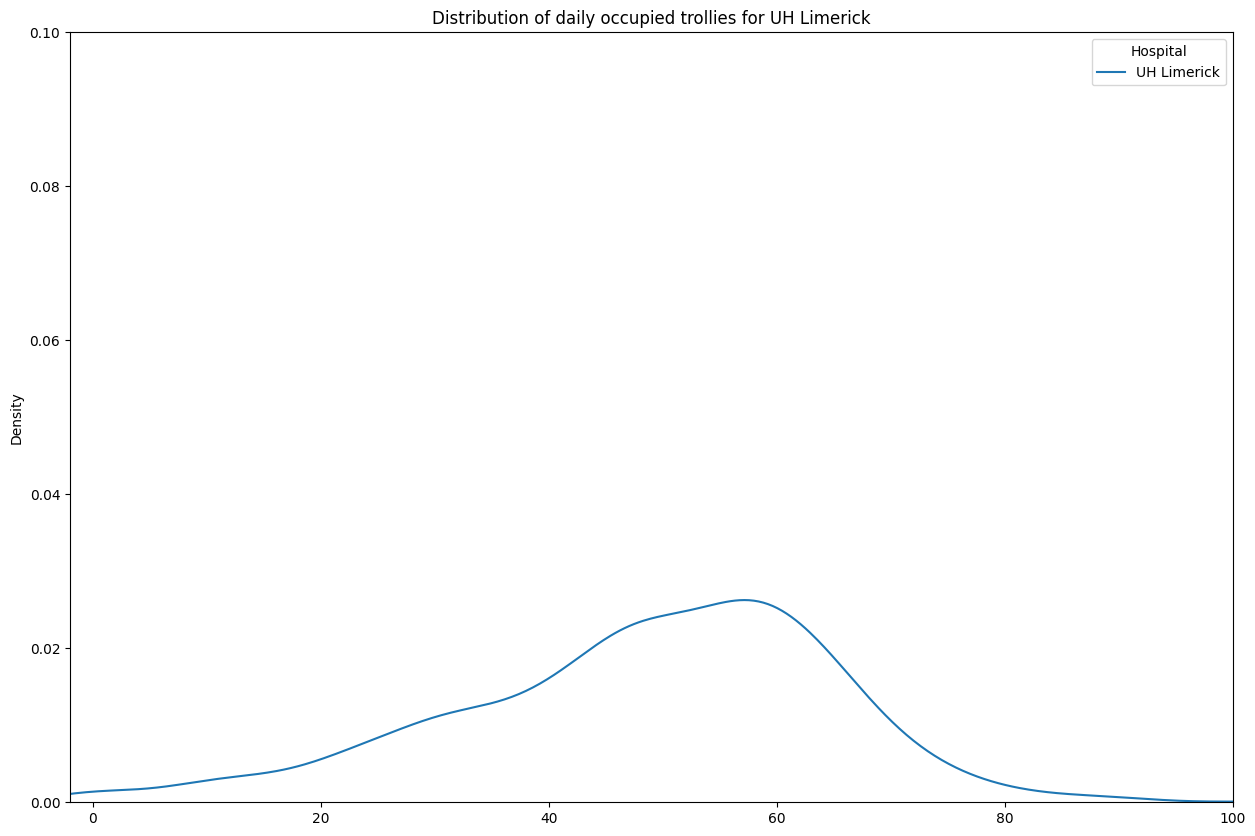

In [17]:
uh_limerick_df = df_filt[df_filt['Hospital'] == 'UH Limerick']
uh_limerick_df.pivot(columns='Hospital', values='Total').plot(  kind='kde',\
                                                                figsize=(15, 10),\
                                                                xlim=(-2, 100),\
                                                                title="Distribution of daily occupied trollies for UH Limerick",\
                                                                ylim=(0, .1))

## Plot Encatchment Areas

<Axes: title={'center': 'Population per region'}, xlabel='HSE Health Regions'>

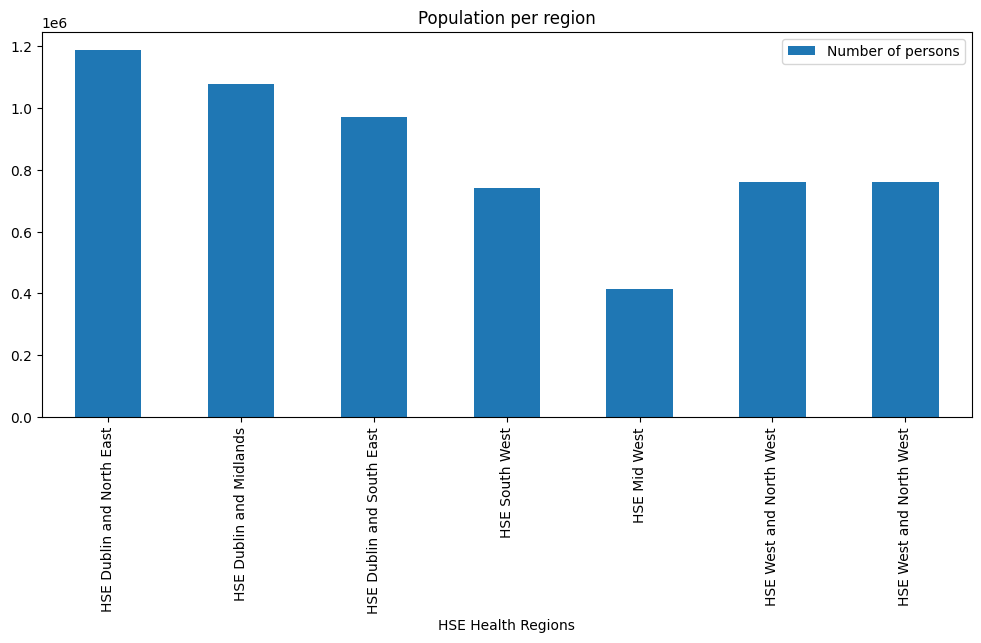

In [18]:
pop_df=pd.read_csv("../data/encatchment_areas.csv")
pop_df.plot(kind='bar', x='HSE Health Regions', y='Number of persons', figsize=(12,5), title="Population per region")


# Weekly Scaled Distributions

In [21]:
df=pd.read_csv('../data/long_weekly_scaledPer10k.csv')

In [19]:
# Old pandas plotting
# df=pd.read_csv('../data/long_weekly_scaledPer10k.csv')
# df.pivot(columns='Region', values='Value')\
#     .plot(kind='kde',\
#             figsize=(15,10),\
#             xlim=(0,25),\
#             title="Distribution of Weekly Occupied Trollies per Region, Scaled per 10k Population",\
#             ylim=(0,.3))

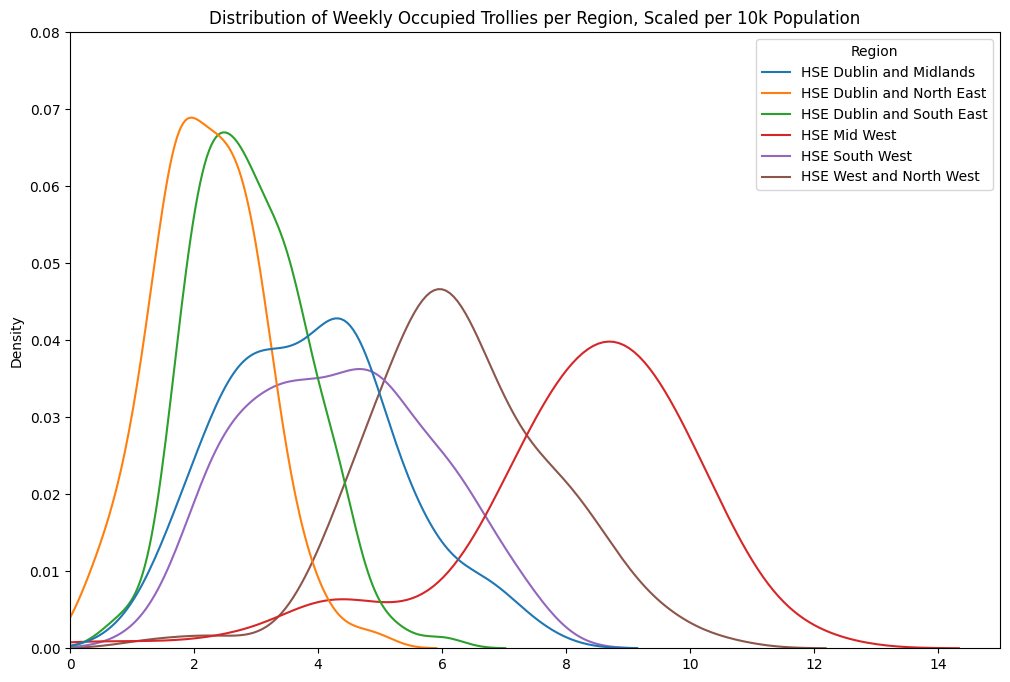

In [24]:

plt.figure(figsize=(12,8))
sns.kdeplot(data=df.pivot(columns='Region', values='Value'))
plt.xlim(0, 15)
plt.ylim(0, .08)
plt.title("Distribution of Weekly Occupied Trollies per Region, Scaled per 10k Population")
plt.show()

(array([ 2.,  0.,  2., 10.,  5., 14., 40., 51., 22.,  5.]),
 array([ 0.        ,  1.21290179,  2.42580358,  3.63870537,  4.85160716,
         6.06450894,  7.27741073,  8.49031252,  9.70321431, 10.9161161 ,
        12.12901789]),
 <BarContainer object of 10 artists>)

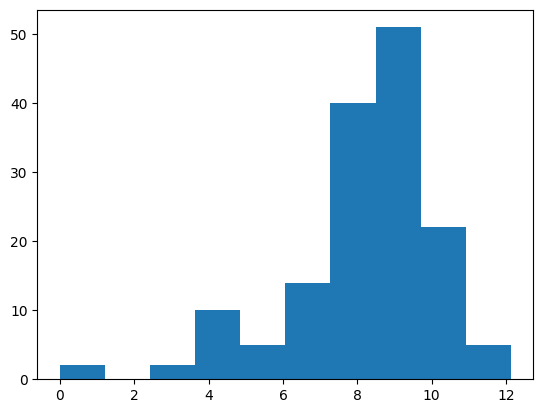

In [10]:
plt.hist(df.pivot(columns='Region', values='Value')["HSE Mid West"])